# Caravan Insurance

The data is owned and supplied by the Dutch data mining company Sentiment Machine Research. It contains information on customers of an insurance company through 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The dataset was collected to answer the following question: `Can you predict who would be interested in buying a caravan insurance policy?`

The dataset and its variable IDs can be found in this [link](https://www.kaggle.com/uciml/caravan-insurance-challenge).

### Machine Learning checklist:

 1. Define a problem statement
 2. Retrieve the dataset 
 3. Explore the data to gain insightful information
 4. Feature engineer 
     * Normalized Data
     * Over Sampling
     * Under Sampling
 5. Employ different ML models
     * Random Forest
     * K-Nearest Neighbors
     * Support Vector Classifier
     * Decision Tree
     * Gradient Boosting
     * Naive Bayes
     * XGBoost
 6. Pick and fine the chosen model 
     * ROC AUC Score
     * ROC Precision Recall Score
     * Precision Score
     * Recall Score
     * F1 Score
 7. Conclusion 

 
## Define a problem statement

**The aim is to develop a predictor which uses knowledge about the 85 variables associated with a customer to determine if he/she will purchase a caravan policy.**  


## Retrieve the dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('caravan-insurance-challenge.csv')
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


## Data exploration

In [3]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
ORIGIN      9822 non-null object
MOSTYPE     9822 non-null int64
MAANTHUI    9822 non-null int64
MGEMOMV     9822 non-null int64
MGEMLEEF    9822 non-null int64
MOSHOOFD    9822 non-null int64
MGODRK      9822 non-null int64
MGODPR      9822 non-null int64
MGODOV      9822 non-null int64
MGODGE      9822 non-null int64
MRELGE      9822 non-null int64
MRELSA      9822 non-null int64
MRELOV      9822 non-null int64
MFALLEEN    9822 non-null int64
MFGEKIND    9822 non-null int64
MFWEKIND    9822 non-null int64
MOPLHOOG    9822 non-null int64
MOPLMIDD    9822 non-null int64
MOPLLAAG    9822 non-null int64
MBERHOOG    9822 non-null int64
MBERZELF    9822 non-null int64
MBERBOER    9822 non-null int64
MBERMIDD    9822 non-null int64
MBERARBG    9822 non-null int64
MBERARBO    9822 non-null int64
MSKA        9822 non-null int64
MSKB1       9822 non-null int64
MSKB2       9822 non-null in

In [207]:
df.isnull().mean()*100

ORIGIN      0.0
MOSTYPE     0.0
MAANTHUI    0.0
MGEMOMV     0.0
MGEMLEEF    0.0
MOSHOOFD    0.0
MGODRK      0.0
MGODPR      0.0
MGODOV      0.0
MGODGE      0.0
MRELGE      0.0
MRELSA      0.0
MRELOV      0.0
MFALLEEN    0.0
MFGEKIND    0.0
MFWEKIND    0.0
MOPLHOOG    0.0
MOPLMIDD    0.0
MOPLLAAG    0.0
MBERHOOG    0.0
MBERZELF    0.0
MBERBOER    0.0
MBERMIDD    0.0
MBERARBG    0.0
MBERARBO    0.0
MSKA        0.0
MSKB1       0.0
MSKB2       0.0
MSKC        0.0
MSKD        0.0
           ... 
PGEZONG     0.0
PWAOREG     0.0
PBRAND      0.0
PZEILPL     0.0
PPLEZIER    0.0
PFIETS      0.0
PINBOED     0.0
PBYSTAND    0.0
AWAPART     0.0
AWABEDR     0.0
AWALAND     0.0
APERSAUT    0.0
ABESAUT     0.0
AMOTSCO     0.0
AVRAAUT     0.0
AAANHANG    0.0
ATRACTOR    0.0
AWERKT      0.0
ABROM       0.0
ALEVEN      0.0
APERSONG    0.0
AGEZONG     0.0
AWAOREG     0.0
ABRAND      0.0
AZEILPL     0.0
APLEZIER    0.0
AFIETS      0.0
AINBOED     0.0
ABYSTAND    0.0
CARAVAN     0.0
Length: 87, dtype: float

**Conclusion**

 * There are 9822 rows and 87 columns total.
 * Almost all attributes are not numerical but categorical!
 * All variables are Ordinal except `"MOSTYPE"` and `"MOSHOOFD"`, which are Nominal.
 * It seems we have no missing variables.

Let's explore some of the customers' characteristics:

**Customer Subtypes**

Text(0, 0.5, 'total_counts')

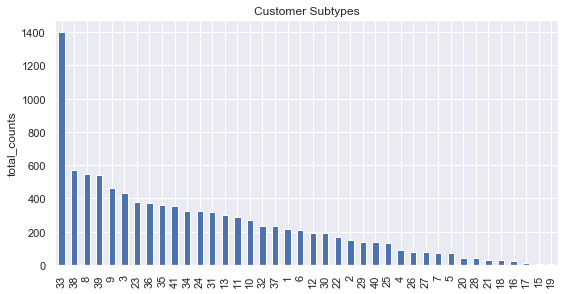

In [214]:
plt.figure(figsize=(9,4.5))
df.MOSTYPE.value_counts().plot.bar(align='center')
plt.title('Customer Subtypes')
plt.ylabel('total_counts')


**Lower class large families** makes up the majority of customer subtypes, followed by **Middle class families**, **Traditional families**, and **Large religious families**. 

**Suburban youth**, **Senior cosmopolitans**, **Fresh masters in the city**, **Students in apartments**, **Single youth**, **Young urban have-nots**, and **Ethnically diverse** are the some of the lowest minority subtypes.  

In [145]:
# stacked bar graph to show the distribution of caravan by the customer subtype
pd.crosstab(df.MOSTYPE, df.CARAVAN, margins=True)

CARAVAN,0,1,All
MOSTYPE,,,
1,192,26,218
2,137,11,148
3,400,33,433
4,87,3,90
5,68,2,70
6,183,26,209
7,67,5,72
8,474,72,546
9,443,17,460


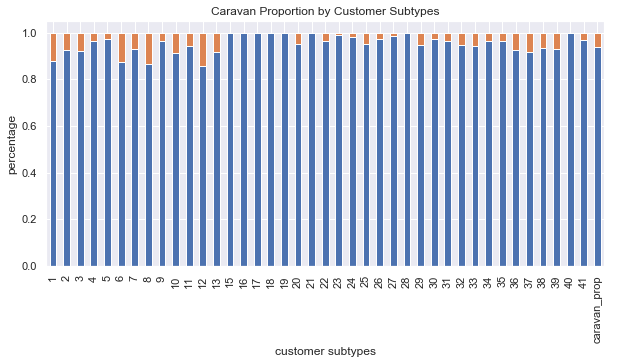

In [146]:
# calculate percentage of caravan by customer subtypes
ct = pd.crosstab(index=df.MOSTYPE, columns=df.CARAVAN, colnames=['CARAVAN'], margins=True, margins_name='caravan_prop',
            normalize='index').rename(columns={'0': 'proportion_0', '1': 'proportion_1'})

# plot stacked bar
ct.plot.bar(stacked=True, figsize=(10,4.5), align='center', legend=False)
plt.title('Caravan Proportion by Customer Subtypes')
plt.ylabel('percentage')
plt.xlabel('customer subtypes')
plt.show()

Of all the customer subtypes, 100% of those ended up purchasing caravan insurance are **Senior cosmopolitan**, **Students in apartments**, **Fresh masters in the city**, **Single youth**, **Suburban youth**, **Young urban have-nots**, **Residential elderly**, and **Large family farms**. Coincidentally, these subgroups are also the minority customer groups as shown in the `Customer Subtypes` graph earlier.

**Age Groups**

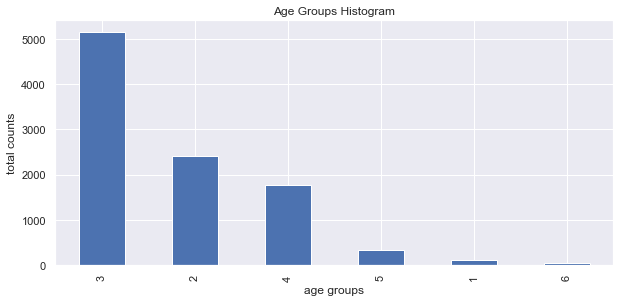

<Figure size 360x324 with 0 Axes>

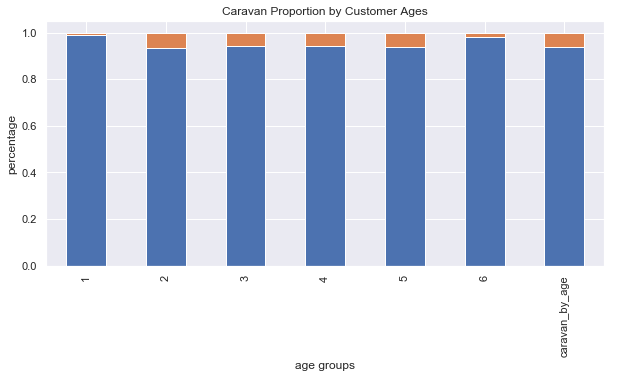

In [148]:
# plot the average age distribution
plt.figure(figsize=(10,4.5))
df.MGEMLEEF.value_counts().plot.bar()
plt.title('Age Groups Histogram')
plt.ylabel('total counts')
plt.xlabel('age groups')
plt.show()

# calculate percentage of caravan by customer ages using crosstab
ct1 = pd.crosstab(index= df.MGEMLEEF, columns=df.CARAVAN, colnames=['CARAVAN'], margins=True, margins_name='caravan_by_age',
                  normalize='index')

# plot stacked bar
plt.figure(figsize=(5,4.5))
ct1.plot.bar(stacked=True, figsize=(10,4.5), align='center', legend=False)
plt.title('Caravan Proportion by Customer Ages')
plt.ylabel('percentage')
plt.xlabel('age groups')
plt.show()

The **40-50 years** age group makes up the majority (~51.53%), whereas the **70-80 years** and **20-30 years** groups comprise ~1.27% and 0.52% of total customers accordingly.

#### Average Household Sizes

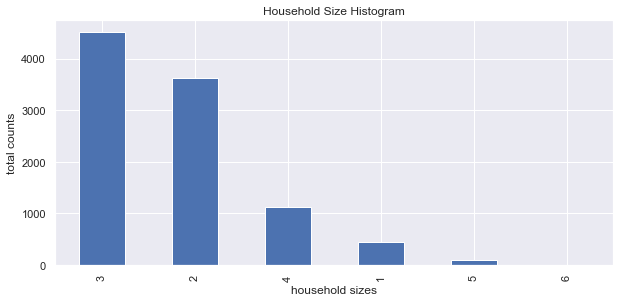

<Figure size 360x324 with 0 Axes>

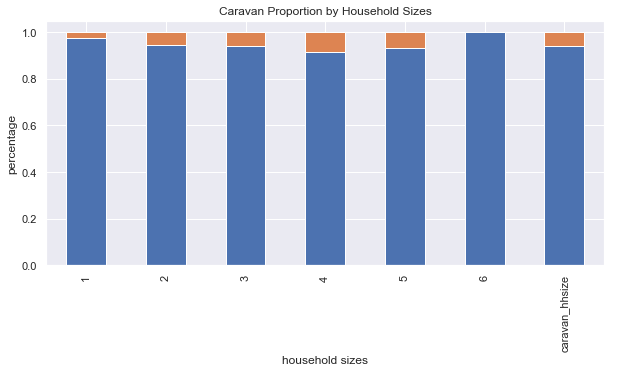

In [149]:
# plot the household size
plt.figure(figsize=(10,4.5))
df.MGEMOMV.value_counts().plot.bar()
plt.title('Household Size Histogram')
plt.ylabel('total counts')
plt.xlabel('household sizes')
plt.show()

# calculate percentage of caravan by customer ages using crosstab
ct1 = pd.crosstab(index= df.MGEMOMV, columns=df.CARAVAN, colnames=['CARAVAN'], margins=True, margins_name='caravan_hhsize',
                  normalize='index')

# plot stacked bar
plt.figure(figsize=(5,4.5))
ct1.plot.bar(stacked=True, figsize=(10,4.5), align='center', legend=False)
plt.title('Caravan Proportion by Household Sizes')
plt.ylabel('percentage')
plt.xlabel('household sizes')
plt.show()

Average household size of **3** and **2** are 45.44% and 36.60% respectively, making up the majority of caravan's customers. 

#### Customer Main Types

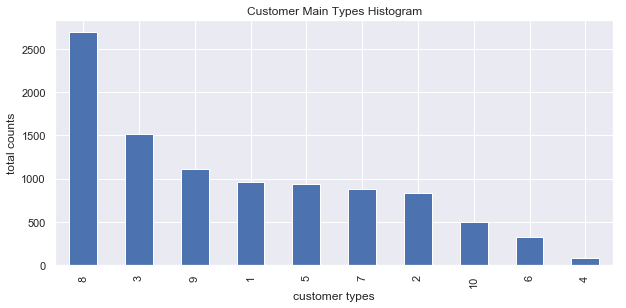

<Figure size 360x324 with 0 Axes>

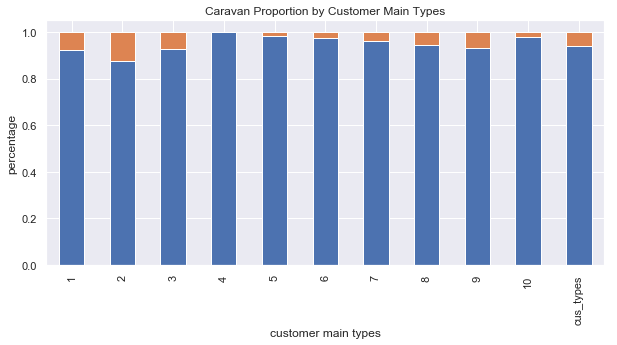

In [151]:
# plot the customer main type
plt.figure(figsize=(10,4.5))
df.MOSHOOFD.value_counts().plot.bar()
plt.title('Customer Main Types Histogram')
plt.ylabel('total counts')
plt.xlabel('customer types')
plt.show()

# calculate percentage of caravan by customer ages using crosstab
ct1 = pd.crosstab(index= df.MOSHOOFD, columns=df.CARAVAN, colnames=['CARAVAN'], margins=True, margins_name='cus_types',
                  normalize='index')

# plot stacked bar
plt.figure(figsize=(5,4.5))
ct1.plot.bar(stacked=True, figsize=(10,4.5), align='center', legend=False)
plt.title('Caravan Proportion by Customer Main Types')
plt.ylabel('percentage')
plt.xlabel('customer main types')
plt.show()

**Family with grown ups** is the main customer types, followed by **Average family** amd **Conservation families**. 

**Finally, let's take a look at our target variable, `CARAVAN`:**

In [208]:
print(df.CARAVAN.value_counts())

0    9236
1     586
Name: CARAVAN, dtype: int64


Text(0, 0.5, 'total_counts')

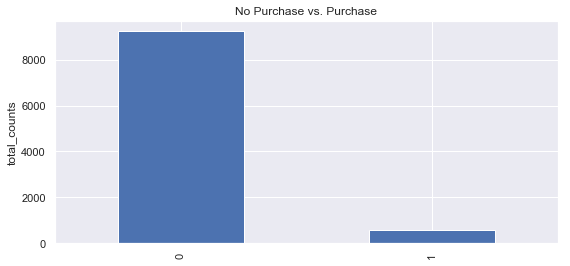

In [213]:
plt.figure(figsize=(9,9))

plt.subplot(211)
df.CARAVAN.value_counts().plot.bar()
plt.title('No Purchase vs. Purchase')
plt.ylabel('total_counts')

From the plot above, it's obvious we have a very imbalanced dataset- just **6%** belongs to the target class, whereas approximately **94%** of customers decided **NOT** to purchase the caravan insurance policy. 

This is a problem becacuse many machine learning models are designed to maximize overall accuracy, which especially with imbalanced classes may not be the best metric to use. Classification accuracy is defined as the number of correct predictions  divided by total predictions times 100. For example, if we simply predicted all purchases as no, we would get a classification accuracy score over 94%. 

# Feature engineer

Let's quickly investigate relationships between variables:

**Correlation Matrix**

In [155]:
# correlation between the target and independent variables
abs_corr_coeffs = df.corr()['CARAVAN'].abs().sort_values(ascending=False)
abs_corr_coeffs

CARAVAN     1.000000
PPERSAUT    0.137053
APERSAUT    0.126768
MKOOPKLA    0.099018
PWAPART     0.098757
PBRAND      0.096709
AWAPART     0.091379
MINKGEM     0.085122
MOPLLAAG    0.084835
MOPLHOOG    0.084373
APLEZIER    0.082763
MINKM30     0.079035
PPLEZIER    0.075779
MHHUUR      0.075743
MHKOOP      0.075283
MAUT0       0.073395
MAUT1       0.070665
MRELGE      0.067168
MSKA        0.064810
ABRAND      0.062517
MINK4575    0.061853
MOSTYPE     0.060742
MZFONDS     0.060607
MZPART      0.059902
MOSHOOFD    0.059306
MRELOV      0.058787
MBERHOOG    0.058354
MBERBOER    0.057811
MFALLEEN    0.054349
MBERARBO    0.053767
              ...   
ATRACTOR    0.019222
PTRACTOR    0.016949
PFIETS      0.016802
MGODRK      0.014993
PAANHANG    0.014260
AINBOED     0.014142
PWERKT      0.013454
AAANHANG    0.012269
AWERKT      0.011896
PWAOREG     0.011839
ABESAUT     0.011590
PBESAUT     0.010750
PVRAAUT     0.009393
AWAOREG     0.009018
PPERSONG    0.008524
AVRAAUT     0.008249
MSKB2       0

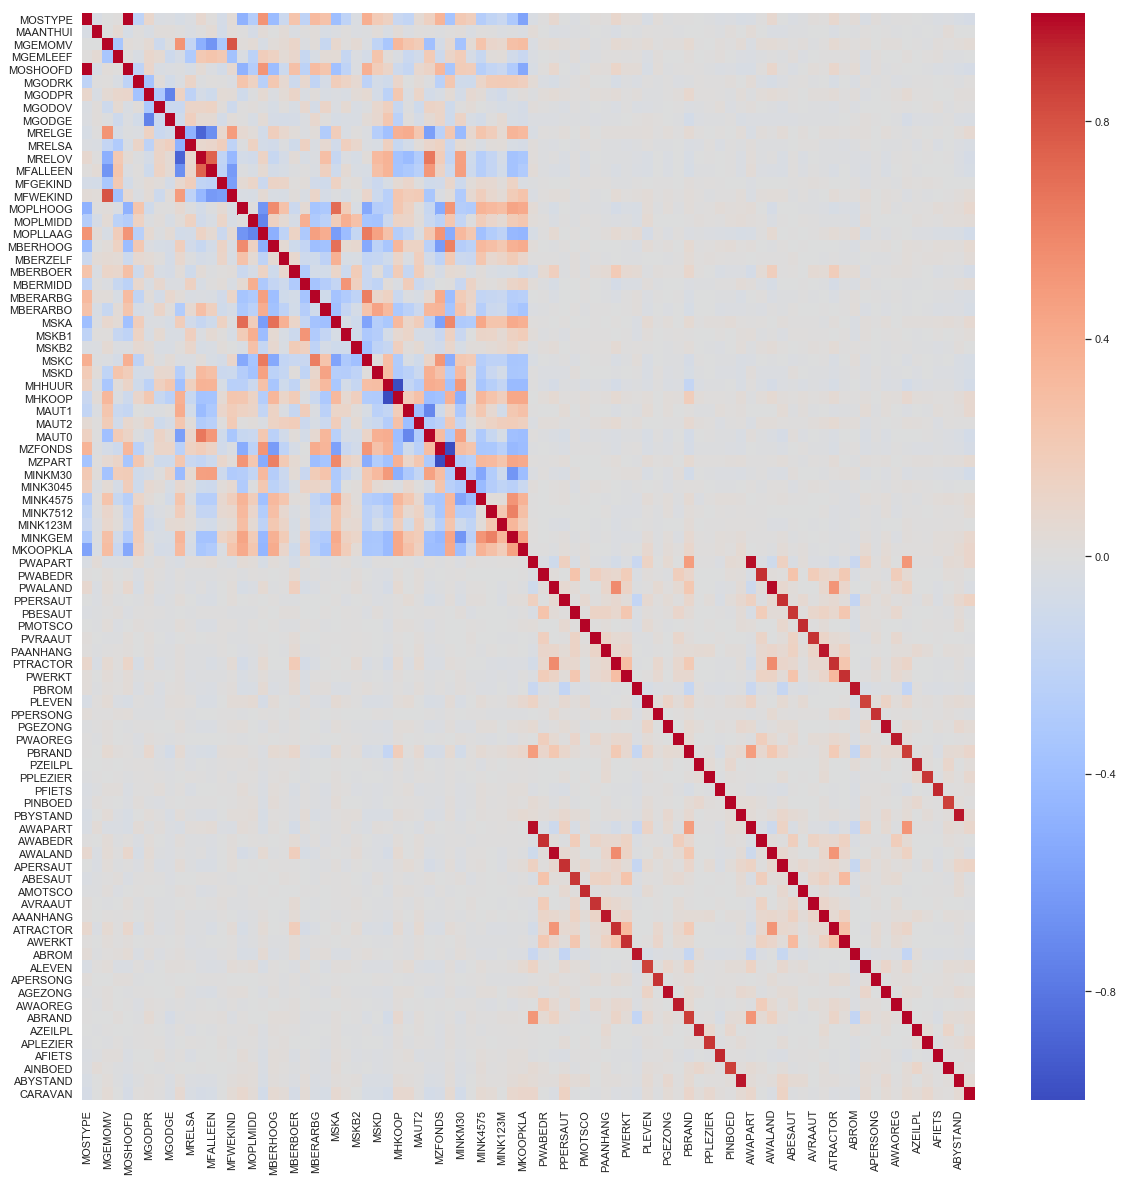

In [164]:
# heatmap to look at the general relationships
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), fmt = ".2f", cmap = "coolwarm")
plt.show()

The data set encloses 85 possible, sometimes highly correlated, input variables. 

# Removing Features with Low Variation

We currently have 85 independent variables and not all of them are useful, in fact, some of them might actually hurt our model performance. Moreover, our dataset is highly imbalanced and we want to predict variables that contribute to the positive class, let's take a look at the positive and negative distributions among the variables before deciding which ones to remove:

C:\Users\vungu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Numbers of Zeros by Features')

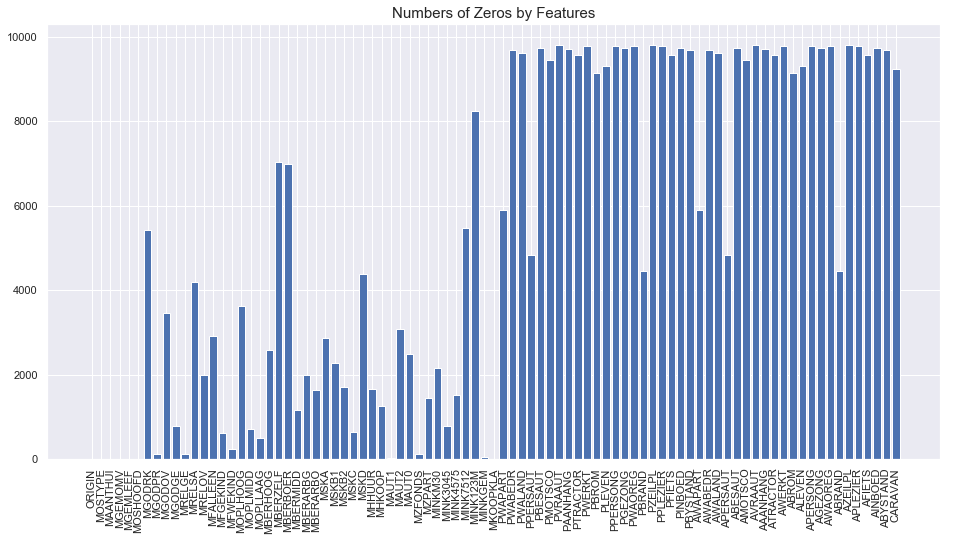

In [19]:
num_0s = []

for i in range(0, len(df.columns)):
    num_nonzero = len(df.iloc[:,i].nonzero()[0])
    num_0s.append(df.shape[0] - num_nonzero)
    
plt.figure(figsize=(16,8))
plt.bar(np.arange(len(df.columns)), num_0s)
plt.xticks(np.arange(len(df.columns)), df.columns)
plt.xticks(rotation=90)
plt.title('Numbers of Zeros by Features', size=15)

**Varibles that contain majority negatives (or 0) won't help towards our prediction for positives (or 1). So let's try removing features that has over 5000 zeros (arbitrarily)**

In [20]:
num_0s = pd.DataFrame(num_0s)
num_0s.set_index(df.columns, inplace=True)
num_0s.columns =['zeros']
dropped_list = num_0s[num_0s.zeros > 5000].index.tolist()
dropped_list

['MGODRK',
 'MBERZELF',
 'MBERBOER',
 'MINK7512',
 'MINK123M',
 'PWAPART',
 'PWABEDR',
 'PWALAND',
 'PBESAUT',
 'PMOTSCO',
 'PVRAAUT',
 'PAANHANG',
 'PTRACTOR',
 'PWERKT',
 'PBROM',
 'PLEVEN',
 'PPERSONG',
 'PGEZONG',
 'PWAOREG',
 'PZEILPL',
 'PPLEZIER',
 'PFIETS',
 'PINBOED',
 'PBYSTAND',
 'AWAPART',
 'AWABEDR',
 'AWALAND',
 'ABESAUT',
 'AMOTSCO',
 'AVRAAUT',
 'AAANHANG',
 'ATRACTOR',
 'AWERKT',
 'ABROM',
 'ALEVEN',
 'APERSONG',
 'AGEZONG',
 'AWAOREG',
 'AZEILPL',
 'APLEZIER',
 'AFIETS',
 'AINBOED',
 'ABYSTAND',
 'CARAVAN']

In [21]:
# drop columns from train set
new_df = df.drop(['MGODRK', 'MBERZELF', 'MBERBOER', 'MINK7512', 'MINK123M', 'PWAPART', 'PWABEDR', 'PWALAND',
                  'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
                  'PGEZONG', 'PWAOREG', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR',
                  'AWALAND', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN',
                  'APERSONG', 'AGEZONG', 'AWAOREG', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND'], axis=1)

new_df.shape

(9822, 44)

C:\Users\vungu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Numbers of Zeros by Features')

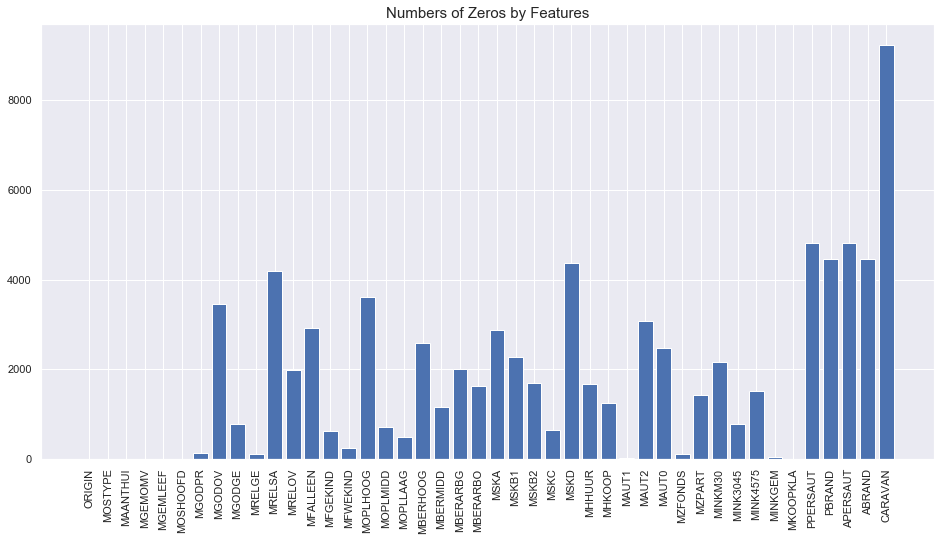

In [22]:
num_0s = []

for i in range(0, len(new_df.columns)):
    num_nonzeros = len(new_df.iloc[:,i].nonzero()[0])
    num_0s.append(new_df.shape[0] - num_nonzeros)

plt.figure(figsize=(16,8))
plt.bar(np.arange(len(new_df.columns)), num_0s)
plt.xticks(np.arange(len(new_df.columns)), new_df.columns)
plt.xticks(rotation=90)
plt.title('Numbers of Zeros by Features', size=15)

Looks much better. Let's move on to:

* Splitting the train set into training and testing sets
* Standardizing the data
* Models testing and selection

# Over Sampling & Data Standardization 

We have roughly `1:15` ratio of positives to negatives. Since our dataset is imbalanced, this can result in a model that tends to more readily classify observations as negatives. 

Out of the current 43 independent variables, one (`ORIGIN`) is completely useless and the other two are `nominal` (`MOSTYPE` and `MOSHOOFD`) and the rest is `ordinal`. We will remove the all three from our modeling process.

Let's first try correcting for this imbalance then normalize our variables. There are a few ways to compensate for class imbalance. For now, we will do `Over Sampling`, increasing our positive class to equal that of negative class:

In [231]:
from sklearn.preprocessing import StandardScaler

X = new_df.drop(['CARAVAN', 'ORIGIN', 'MOSTYPE', 'MOSHOOFD'], axis=1)
Y = new_df['CARAVAN']

Xtrain, Xval, ytrain, yval = train_test_split(X,Y, test_size=0.3, random_state=1)

from sklearn.utils import resample
# reconcat X_train, y_train
train1 = pd.concat([Xtrain, ytrain], axis=1)

# separate minority and majority class from the small training set
minority_1 = train1[train1['CARAVAN']==1]
majority_0 = train1[train1['CARAVAN']==0]

# upsample minority
upsampled_1 = resample(minority_1,
                      replace=True,
                      n_samples = len(majority_0),
                      random_state=1)

# combine majority and minority
upsample1 = pd.concat([majority_0, upsampled_1])

# check new class counts
upsample1['CARAVAN'].value_counts()

1    6475
0    6475
Name: CARAVAN, dtype: int64

In [232]:
# split train data into Xtrain and ytrain
Xtu = upsample1.drop('CARAVAN', 1)
ytu = upsample1['CARAVAN']

# normalize Xtrain
scaler = StandardScaler()
Xtus = scaler.fit_transform(Xtu) # ytu
Xvus = scaler.transform(Xval)    # yval  #yvo_pred_lr/knn/svm     #yvo_proba_lr   Xvus---> yval

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vungu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


# Models Testing and Selection

* The `ROC` plot is a popular and powerful measure to evaluate binary classifiers. Nonetheless, it has some limitations when applied to imbalanced datasets. 

* The `precision-recall` plot is able to show the performance difference between balanced and imbalanced cases. It is also useful to reveal the performance of high ranking instances.

* To measure our models performances, we will look at the `ROC AUC`, `ROC Precision-Recall`, `Precision`, `Recall`, and `F1 scores`.

### KNearest Neighbors

In [216]:
from sklearn.neighbors import KNeighborsClassifier

# classify with KNN
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,10]}
gsknn = GridSearchCV(knn, parameters, cv=10)
gsknn.fit(Xtus, ytu)
# find the best knn models
best_knn = gsknn.best_estimator_
# make prediction using best knn
yvo_pred_knn = best_knn.predict(Xvus)
# exam confusion matrix
confusion_matrix(yval, yvo_pred_knn)

array([[2394,  367],
       [ 137,   49]], dtype=int64)

In [217]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

# examine metrics
yvo_proba_knn = best_knn.predict_proba(Xvus)
knn_fpr_scaled, knn_tpr_scaled, threshold = roc_curve(yval, yvo_proba_knn[:,1])
knn_roc_auc_scaled = auc(knn_fpr_scaled, knn_tpr_scaled)
print('AUC: %0.2f' % knn_roc_auc_scaled)
print(classification_report(yval, yvo_pred_knn))

AUC: 0.59
              precision    recall  f1-score   support

           0       0.95      0.87      0.90      2761
           1       0.12      0.26      0.16       186

   micro avg       0.83      0.83      0.83      2947
   macro avg       0.53      0.57      0.53      2947
weighted avg       0.89      0.83      0.86      2947



f1=0.163 auc=0.146 ap=0.088


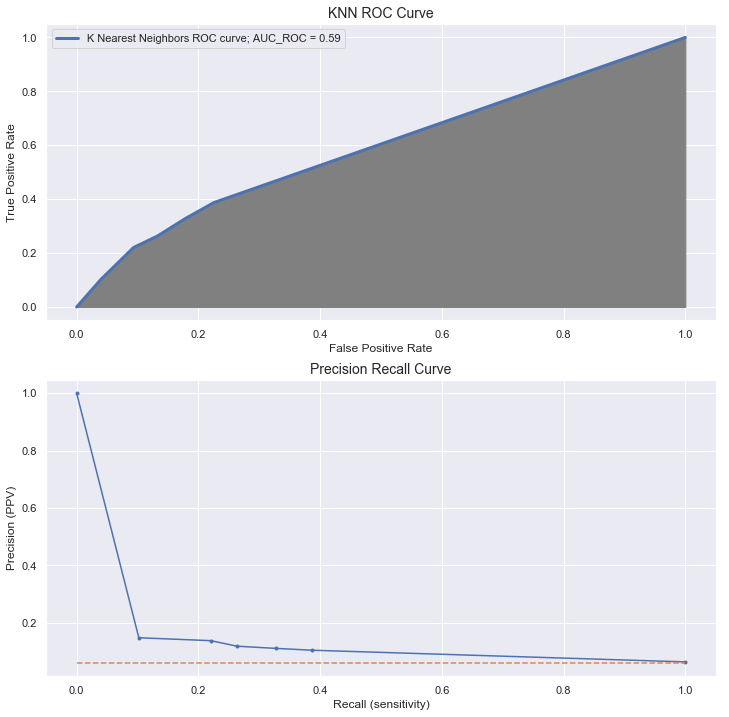

In [218]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(knn_fpr_scaled, knn_tpr_scaled, 0, color='grey')
plt.plot(knn_fpr_scaled, knn_tpr_scaled, linewidth=3, label='K Nearest Neighbors ROC curve; AUC_ROC = %0.2f' % knn_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_knn[:,1])
# calc f1
f1 = f1_score(yval, yvo_pred_knn)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_knn[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot the precision-recall curve
plt.subplot(212)
plt.title('Precision Recall Curve', size=14)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Since we want to predict positives, these scores seem kinda low. 

Still, we have plenty of models to try out.


### Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import auc, roc_curve, roc_auc_score

rf = RandomForestClassifier(random_state=1)
parameters = {'class_weight':['balanced', None],
                  'max_depth': [1,4],
                  'max_features':['auto',10,20,30]}
gsrf = GridSearchCV(rf, parameters, cv=10)
gsrf.fit(Xtus, ytu)
best_rf = gsrf.best_estimator_
yvo_pred_rf = best_rf.predict(Xvus)
# exam confusion matrix
confusion_matrix(yval, yvo_pred_rf)

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([[2016,  745],
       [  68,  118]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      2761
           1       0.14      0.63      0.22       186

   micro avg       0.72      0.72      0.72      2947
   macro avg       0.55      0.68      0.53      2947
weighted avg       0.91      0.72      0.79      2947

f1=0.225 auc=0.186 ap=0.173


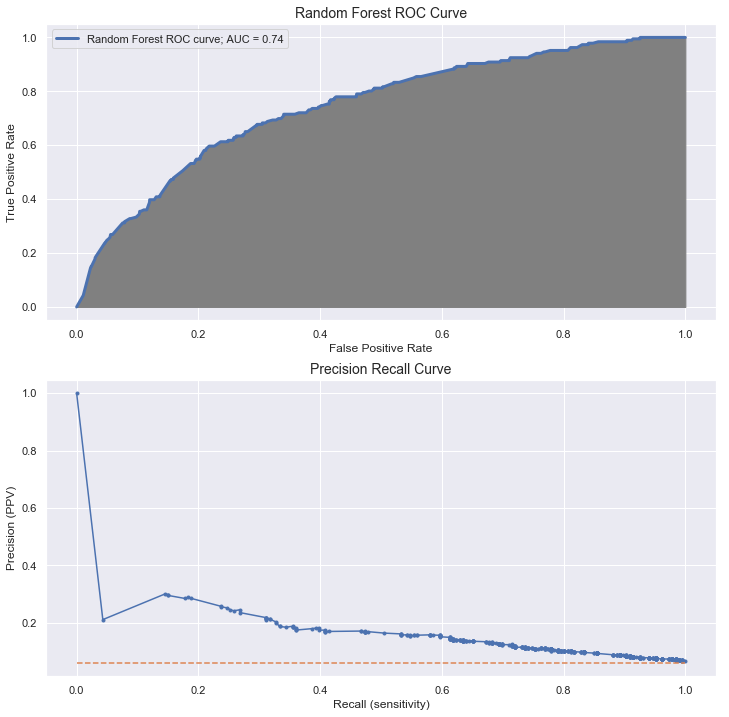

In [223]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc, roc_curve, roc_auc_score

print(classification_report(yval, yvo_pred_rf))

# examine metrics
yvo_proba_rf = best_rf.predict_proba(Xvus)
rf_fpr_scaled, rf_tpr_scaled, threshold = roc_curve(yval, yvo_proba_rf[:,1])
rf_roc_auc_scaled = auc(rf_fpr_scaled, rf_tpr_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(rf_fpr_scaled, rf_tpr_scaled, 0, color='grey')
plt.plot(rf_fpr_scaled, rf_tpr_scaled, linewidth=3, label='Random Forest ROC curve; AUC = %0.2f' % rf_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_rf[:,1])
# calc f1
f1 = f1_score(yval, yvo_pred_rf)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_rf[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot the precision-recall curve
plt.subplot(212)
plt.title('Precision Recall Curve', size=14)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

While our true negatives prediction go down, our precision, recall, ROCs, and f1 score all increase for our positive class. Again, since we want to predict positives, this might be an acceptable trade-off. 

### Support Vector Classifier

In [180]:
from sklearn.svm import SVC

parameters = {'C':[1,2]}
gssvc = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=1, gamma='auto'), parameters, cv=10, scoring='roc_auc')
gssvc.fit(Xtus, ytu)
# best estimator
best_svc = gssvc.best_estimator_
# make prediction using best svc
yvo_pred_svc = best_svc.predict(Xvus)
# exam confusion matrix
print(confusion_matrix(yval, yvo_pred_svc))

[[2249  512]
 [ 111   75]]


              precision    recall  f1-score   support

           0       0.95      0.81      0.88      2761
           1       0.13      0.40      0.19       186

   micro avg       0.79      0.79      0.79      2947
   macro avg       0.54      0.61      0.54      2947
weighted avg       0.90      0.79      0.84      2947

f1=0.194 auc=0.112 ap=0.114


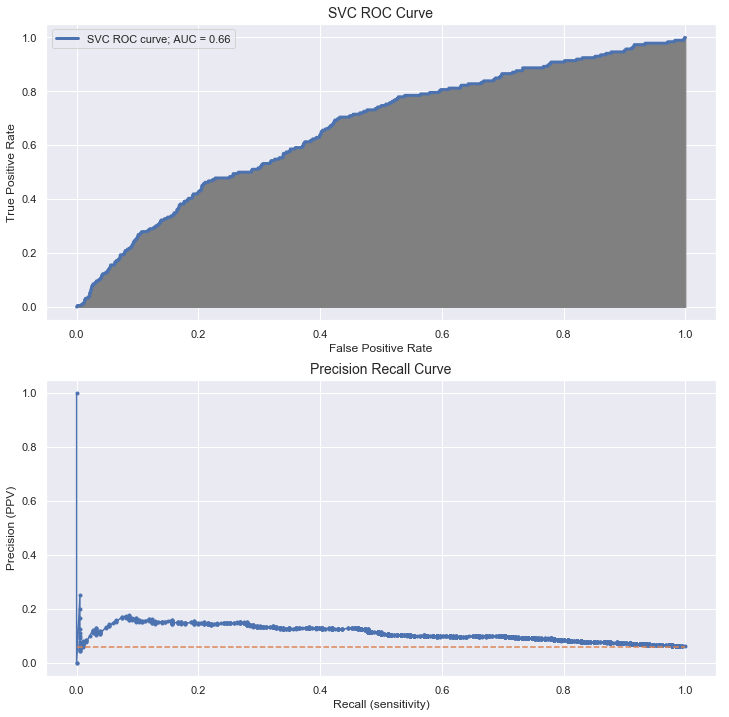

In [182]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
print(classification_report(yval, yvo_pred_svc))

# examine metrics
yvo_proba_svc = best_svc.predict_proba(Xvus)
svc_fpr_scaled, svc_tpr_scaled, threshold = roc_curve(yval, yvo_proba_svc[:,1])
svc_roc_auc_scaled = auc(svc_fpr_scaled, svc_tpr_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(svc_fpr_scaled, svc_tpr_scaled, 0, color='grey')
plt.plot(svc_fpr_scaled, svc_tpr_scaled, linewidth=3, label='SVC ROC curve; AUC = %0.2f' % svc_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_svc[:,1])
# calc f1
f1 = f1_score(yval, yvo_pred_svc)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_svc[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.subplot(212)
plt.title('Precision Recall Curve', size=14)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()


All metrics related to the positive class decrease. This model isn't as good as the previous one.

### Tree Ensemble Model

In [184]:
parameters = {'learning_rate':[0.1,1.0],
              'n_estimators':[100,200,300]
            }
decisionTree = GradientBoostingClassifier(random_state=1)
gsdt = GridSearchCV(decisionTree, parameters,scoring = 'roc_auc')
gsdt.fit(Xtus,ytu)

# best estimator
best_dt = gsdt.best_estimator_

# Get predictions
yvo_pred_dt = best_dt.predict(Xvus)

# exam confusion matrix
print(confusion_matrix(yval, yvo_pred_dt))
print(classification_report(yval, yvo_pred_dt))

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[[2454  307]
 [ 136   50]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2761
           1       0.14      0.27      0.18       186

   micro avg       0.85      0.85      0.85      2947
   macro avg       0.54      0.58      0.55      2947
weighted avg       0.90      0.85      0.87      2947



AUC: 0.64
f1=0.184 auc=0.112 ap=0.115


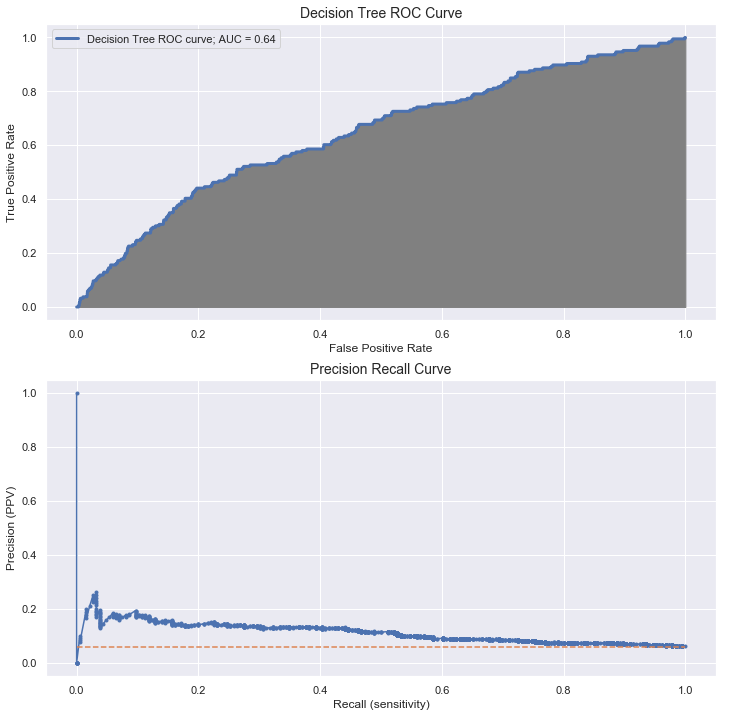

In [185]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
yvo_proba_dt = best_dt.predict_proba(Xvus)
dt_fpr_scaled, dt_tpr_scaled, threshold = roc_curve(yval, yvo_proba_dt[:,1])
dt_roc_auc_scaled = auc(dt_fpr_scaled, dt_tpr_scaled)
print('AUC: %0.2f' % dt_roc_auc_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(dt_fpr_scaled, dt_tpr_scaled, 0, color='grey')
plt.plot(dt_fpr_scaled, dt_tpr_scaled, linewidth=3, label='Decision Tree ROC curve; AUC = %0.2f' % dt_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_dt[:,1])
# calc f1
f1 = f1_score(yval, yvo_pred_dt)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_dt[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Our recall, ROC, and f1 scores all go down. 

### Gradient Boosting Model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
[[2101  660]
 [  77  109]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2761
           1       0.14      0.59      0.23       186

   micro avg       0.75      0.75      0.75      2947
   macro avg       0.55      0.67      0.54      2947
weighted avg       0.91      0.75      0.81      2947

0.8776768230657979
AUC ROC_AUC: 0.74
f1=0.228 auc_prc=0.177 ap=0.178


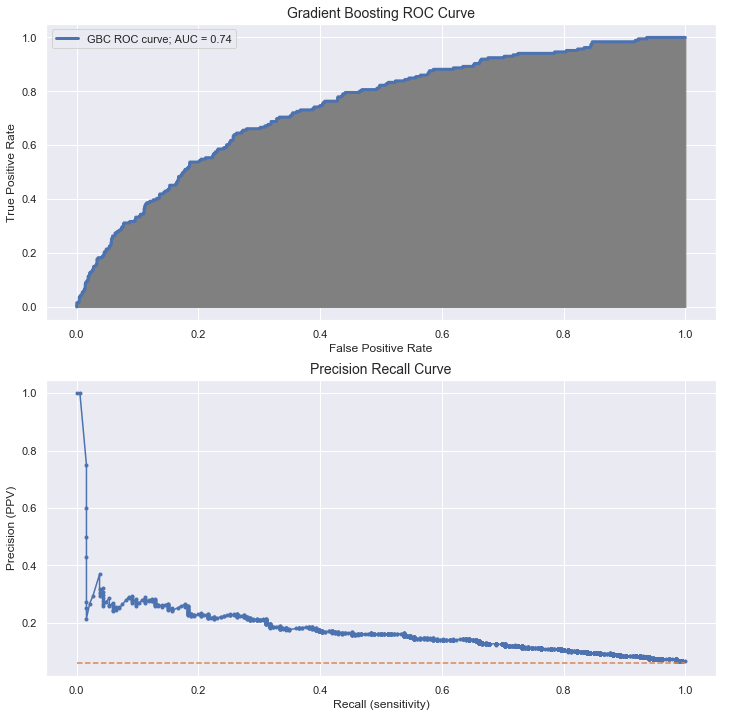

In [186]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import GradientBoostingClassifier

parameters = {'subsample':[0.5,0.8]}
gsgbc1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05, n_estimators=60, min_samples_split=50, min_samples_leaf=5, 
                                                       max_depth=5, max_features='sqrt', random_state=1),
                  param_grid=parameters, scoring='roc_auc', n_jobs=4, cv=10)
gsgbc1.fit(Xtus,ytu)

# best estimator
best_gbc = gsgbc1.best_estimator_
print(best_gbc)
# Get predictions
yvo_pred_gbc = best_gbc.predict(Xvus)

# exam confusion matrix
print(confusion_matrix(yval, yvo_pred_gbc))
print(classification_report(yval, yvo_pred_gbc))
print(gsgbc1.best_score_)

# examine metrics
yvo_proba_gbc = best_gbc.predict_proba(Xvus)
gbc_fpr_scaled, gbc_tpr_scaled, threshold = roc_curve(yval, yvo_proba_gbc[:,1])
gbc_roc_auc_scaled = auc(gbc_fpr_scaled, gbc_tpr_scaled)
print('AUC ROC_AUC: %0.2f' % gbc_roc_auc_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(gbc_fpr_scaled, gbc_tpr_scaled, 0, color='grey')
plt.plot(gbc_fpr_scaled, gbc_tpr_scaled, linewidth=3, label='GBC ROC curve; AUC = %0.2f' % gbc_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_gbc[:,1])
# calc f1
f1 = f1_score(yval, yvo_pred_gbc)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_gbc[:,1])
print('f1=%.3f auc_prc=%.3f ap=%.3f' % (f1, auc, ap))

# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

This model predicts true positives much better than the previous one; its ROC AUC and ROC PRC scores are also higher.

### Naive Bayes

In [187]:
from sklearn.model_selection import StratifiedKFold
    
skf = StratifiedKFold(n_splits=10, random_state=1)
parameters = {}
#BernoulliNB is designed for binary/boolean features and is suitable for discrete data
nb = BernoulliNB()
gsnb = GridSearchCV(nb, cv=skf, param_grid=parameters, return_train_score=True)
gsnb.fit(Xtus,ytu)
best_nb = gsnb.best_estimator_

yvo_pred_nb = best_nb.predict(Xvus)
print(confusion_matrix(yval, yvo_pred_nb))
print(classification_report(yval, yvo_pred_nb))

[[1835  926]
 [  73  113]]
              precision    recall  f1-score   support

           0       0.96      0.66      0.79      2761
           1       0.11      0.61      0.18       186

   micro avg       0.66      0.66      0.66      2947
   macro avg       0.54      0.64      0.49      2947
weighted avg       0.91      0.66      0.75      2947



AUC: 0.70
f1=0.184 auc=0.140 ap=0.141


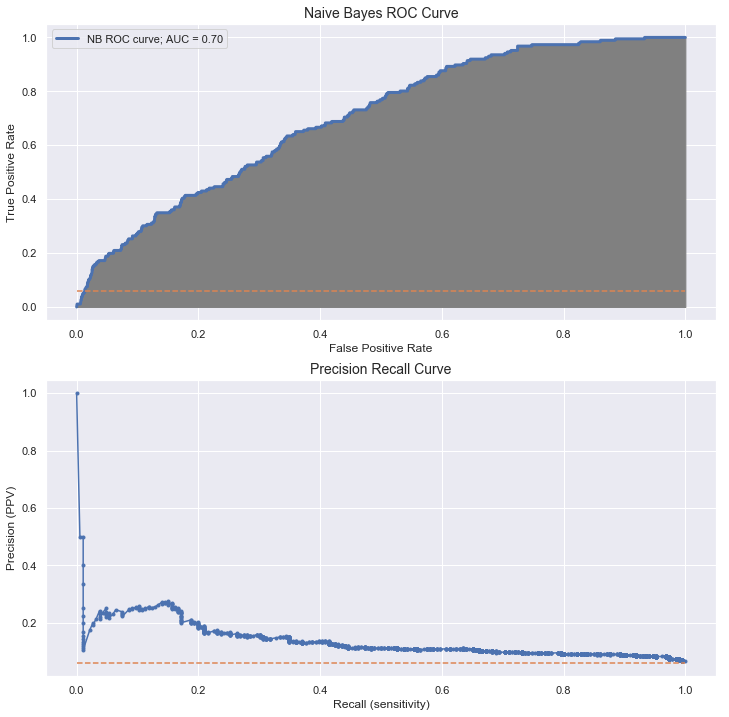

In [188]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
yvo_proba_nb = best_nb.predict_proba(Xvus)
nb_fpr_scaled, nb_tpr_scaled, threshold = roc_curve(yval, yvo_proba_nb[:,1])
nb_roc_auc_scaled = auc(nb_fpr_scaled, nb_tpr_scaled)
print('AUC: %0.2f' % nb_roc_auc_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(nb_fpr_scaled, nb_tpr_scaled, 0, color='grey')
plt.plot(nb_fpr_scaled, nb_tpr_scaled, linewidth=3, label='NB ROC curve; AUC = %0.2f' % nb_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_nb[:,1])
# calc f1
f1 = f1_score(yval, yvo_pred_nb)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_nb[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')

# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Our true negatives go down but true positives improve, which is a good thing.

### XGBOOST MODEL

In [233]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

paramters1 = {
   'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
gsxgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,
 min_child_weight=1, max_depth=3, gamma=0, subsample=1, colsample_bytree=1, 
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, random_state=1), 
 param_grid = parameters1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsxgb.fit(Xtus, ytu)
print(gsxgb.best_params_, gsxgb.best_score_)

yvo_pred_xgb = gsxgb.predict(Xvus)

#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(yval, yvo_pred_xgb))
print("AUC Score: %f" % roc_auc_score(yval, yvo_pred_xgb))
print(confusion_matrix(yval, yvo_pred_xgb))
print(classification_report(yval, yvo_pred_xgb))

{'C': 2} 0.8716901887841964

Model Report
Accuracy : 0.7625
AUC Score: 0.660133
[[2146  615]
 [  85  101]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2761
           1       0.14      0.54      0.22       186

   micro avg       0.76      0.76      0.76      2947
   macro avg       0.55      0.66      0.54      2947
weighted avg       0.91      0.76      0.82      2947



We have somewhat better scores here compared to a few other models but it is not the best model. 


# Down Sampling & Data Standardization

Let's give down sampling a try and see if it helps improving our models' predictive and accuracy power:

In [102]:
# reconcat X_train, y_train
train2 = pd.concat([Xtrain, ytrain], axis=1)

# separate minority and majority class from the small training set
minority_1 = train2[train2['CARAVAN']==1]
majority_0 = train2[train2['CARAVAN']==0]

# upsample minority
downsampled_1 = resample(majority_0,
                      replace = False,
                      n_samples = len(minority_1),
                      random_state=1)

# combine majority and minority
downsample1 = pd.concat([minority_1, downsampled_1], sort=True)

# check new class counts
downsample1['CARAVAN'].value_counts()

1    400
0    400
Name: CARAVAN, dtype: int64

In [103]:
# split train data into Xtrain and ytrain
Xtd = downsample1.drop('CARAVAN', 1)
ytd = downsample1['CARAVAN']

# normalize Xtrain
scaler = StandardScaler()
Xtds = scaler.fit_transform(Xtd) # ytd
Xvds = scaler.transform(Xval)    # yval  #yvd_pred_lr/knn/svm     #yvd_proba_lr   Xvds---> yval

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vungu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### KNearest Neighbors

In [190]:
# classify with KNN
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,6]}
gsknn = GridSearchCV(knn, parameters, cv=10)
gsknn.fit(Xtds, ytd)
# find the best knn models
best_knn = gsknn.best_estimator_
# make prediction using best knn
yvd_pred_knn = best_knn.predict(Xvds)
# exam confusion matrix
confusion_matrix(yval, yvd_pred_knn)

array([[1789,  972],
       [ 132,   54]], dtype=int64)

AUC: 0.45
              precision    recall  f1-score   support

           0       0.93      0.65      0.76      2761
           1       0.05      0.29      0.09       186

   micro avg       0.63      0.63      0.63      2947
   macro avg       0.49      0.47      0.43      2947
weighted avg       0.88      0.63      0.72      2947

f1=0.089 auc=0.052 ap=0.057


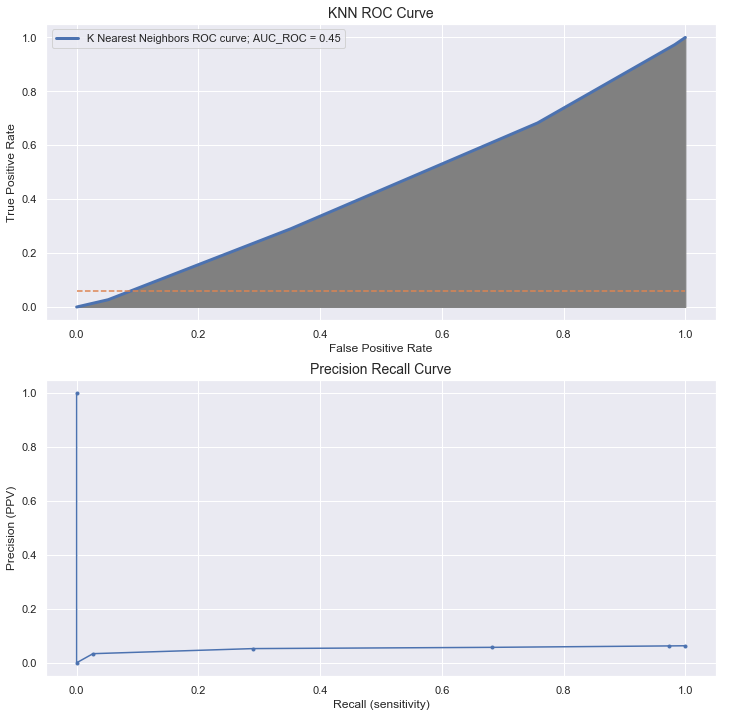

In [191]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
yvd_proba_knn = best_knn.predict_proba(Xvds)
knn_fpr_scaled, knn_tpr_scaled, threshold = roc_curve(yval, yvd_proba_knn[:,1])
knn_roc_auc_scaled = auc(knn_fpr_scaled, knn_tpr_scaled)
print('AUC: %0.2f' % knn_roc_auc_scaled)
print(classification_report(yval, yvd_pred_knn))

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(knn_fpr_scaled, knn_tpr_scaled, 0, color='grey')
plt.plot(knn_fpr_scaled, knn_tpr_scaled, linewidth=3, label='K Nearest Neighbors ROC curve; AUC_ROC = %0.2f' % knn_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvd_proba_knn[:,1])
# calc f1
f1 = f1_score(yval, yvd_pred_knn)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvd_proba_knn[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')
# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Our metrics look worse than before.

### Random Forest

In [192]:
rf = RandomForestClassifier(random_state=1)
parameters = {'class_weight':['balanced', None],
                  'max_depth': [1,4],
                  'max_features':['auto',10,20,30]}
gsrf = GridSearchCV(rf, parameters, cv=10)
gsrf.fit(Xtds, ytd)
best_rf = gsrf.best_estimator_
yvd_pred_rf = best_rf.predict(Xvds)
# exam confusion matrix
confusion_matrix(yval, yvd_pred_rf)

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([[2756,    5],
       [ 185,    1]], dtype=int64)

AUC: 0.54
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2761
           1       0.17      0.01      0.01       186

   micro avg       0.94      0.94      0.94      2947
   macro avg       0.55      0.50      0.49      2947
weighted avg       0.89      0.94      0.91      2947

f1=0.010 auc=0.077 ap=0.079


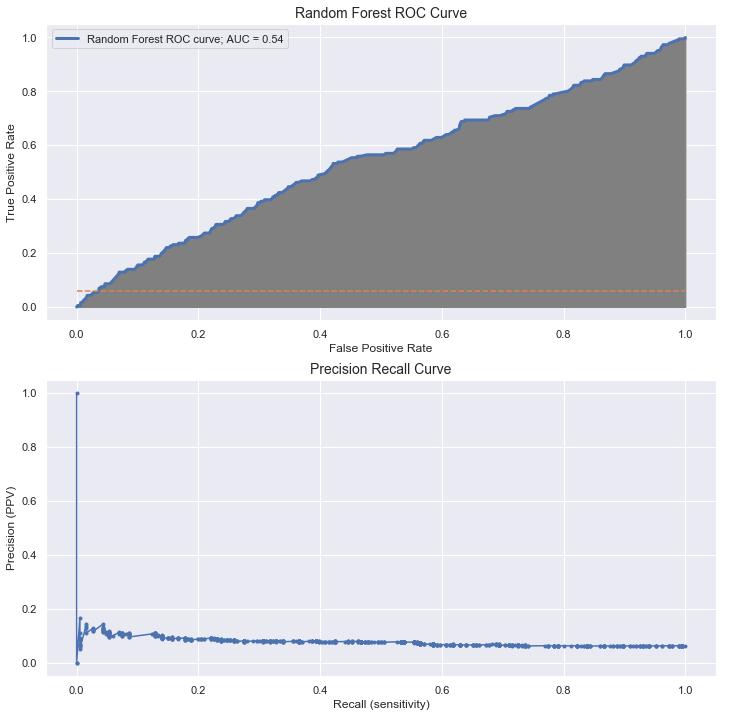

In [193]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
yvd_proba_rf = best_rf.predict_proba(Xvds)
rf_fpr_scaled, rf_tpr_scaled, threshold = roc_curve(yval, yvd_proba_rf[:,1])
rf_roc_auc_scaled = auc(rf_fpr_scaled, rf_tpr_scaled)
print('AUC: %0.2f' % rf_roc_auc_scaled)
print(classification_report(yval, yvd_pred_rf))

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(rf_fpr_scaled, rf_tpr_scaled, 0, color='grey')
plt.plot(rf_fpr_scaled, rf_tpr_scaled, linewidth=3, label='Random Forest ROC curve; AUC = %0.2f' % rf_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvd_proba_rf[:,1])
# calc f1
f1 = f1_score(yval, yvd_pred_rf)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvd_proba_rf[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')
# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Certainly not the worst model but is still unacceptable.

### Support Vector Classifier

In [194]:
parameters = {'C':[0.001,0.01,0.1,1,2]}
gssvc = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=1), parameters, cv=10, scoring='roc_auc')
gssvc.fit(Xtds, ytd)
# best estimator
best_svc = gssvc.best_estimator_
# make prediction using best svc
yvd_pred_svc = best_svc.predict(Xvds)
# exam confusion matrix
print(confusion_matrix(yval, yvd_pred_svc))

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[[2761    0]
 [ 186    0]]


C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2761
           1       0.00      0.00      0.00       186

   micro avg       0.94      0.94      0.94      2947
   macro avg       0.47      0.50      0.48      2947
weighted avg       0.88      0.94      0.91      2947

f1=0.000 auc=0.062 ap=0.063


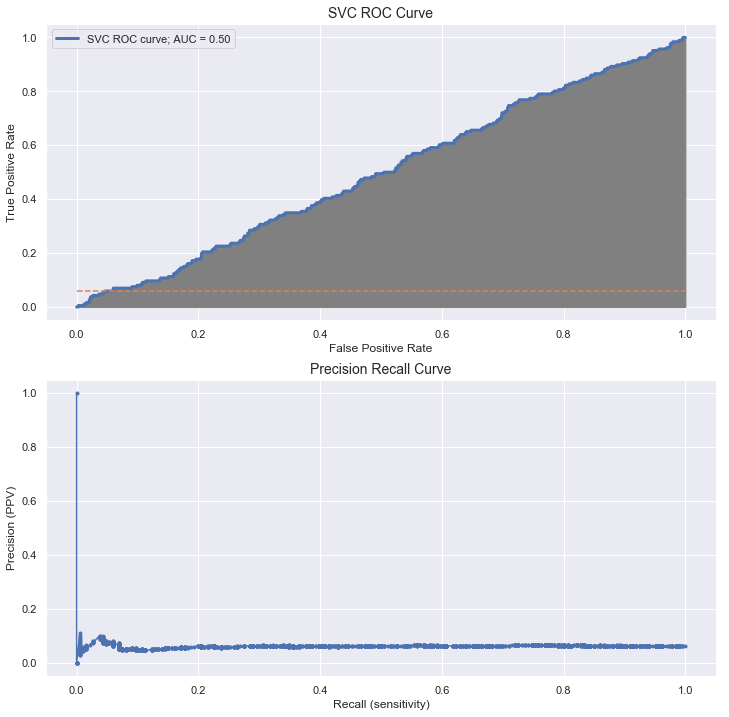

In [195]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
print(classification_report(yval, yvd_pred_svc))

yvd_proba_svc = best_svc.predict_proba(Xvds)
svc_fpr_scaled, svc_tpr_scaled, threshold = roc_curve(yval, yvd_proba_svc[:,1])
svc_roc_auc_scaled = auc(svc_fpr_scaled, svc_tpr_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(svc_fpr_scaled, svc_tpr_scaled, 0, color='grey')
plt.plot(svc_fpr_scaled, svc_tpr_scaled, linewidth=3, label='SVC ROC curve; AUC = %0.2f' % svc_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvd_proba_svc[:,1])
# calc f1
f1 = f1_score(yval, yvd_pred_svc)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvd_proba_svc[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')
# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

This model correctly predicts all the negative '0' values but zero correct positives '1'.

### Tree Ensemble Model

In [196]:
parameters = {'learning_rate':[0.1,1.0],
              'n_estimators':[100,200,300]
            }
decisionTree = GradientBoostingClassifier(random_state=1)
gsdt = GridSearchCV(decisionTree, parameters,scoring = 'roc_auc')
gsdt.fit(Xtds,ytd)

# best estimator
best_dt = gsdt.best_estimator_

# Get predictions
yvd_pred_dt = best_dt.predict(Xvds)

# exam confusion matrix
print(confusion_matrix(yval, yvd_pred_dt))
print(classification_report(yval, yvd_pred_dt))

C:\Users\vungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[[2550  211]
 [ 165   21]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2761
           1       0.09      0.11      0.10       186

   micro avg       0.87      0.87      0.87      2947
   macro avg       0.51      0.52      0.52      2947
weighted avg       0.89      0.87      0.88      2947



AUC: 0.57
f1=0.100 auc=0.080 ap=0.082


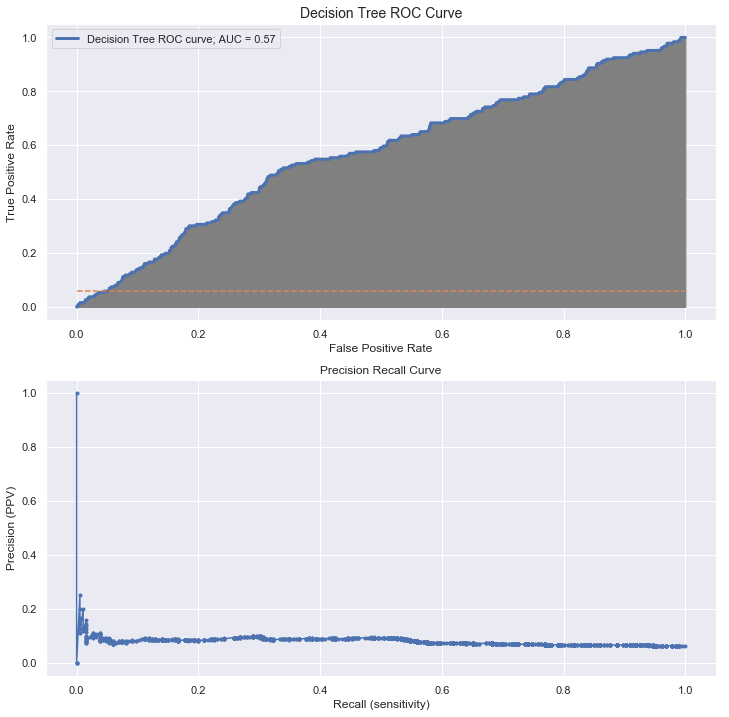

In [197]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


# examine metrics
yvd_proba_dt = best_dt.predict_proba(Xvds)
dt_fpr_scaled, dt_tpr_scaled, threshold = roc_curve(yval, yvd_proba_dt[:,1])
dt_roc_auc_scaled = auc(dt_fpr_scaled, dt_tpr_scaled)
print('AUC: %0.2f' % dt_roc_auc_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(dt_fpr_scaled, dt_tpr_scaled, 0, color='grey')
plt.plot(dt_fpr_scaled, dt_tpr_scaled, linewidth=3, label='Decision Tree ROC curve; AUC = %0.2f' % dt_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvd_proba_dt[:,1])
# calc f1
f1 = f1_score(yval, yvd_pred_dt)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvd_proba_dt[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')
# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve')
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Not the worst model yet but is still bad

### Gradient Booster

In [198]:
parameters = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gbc = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', loss='exponential', random_state=1), 
param_grid = parameters, scoring='roc_auc',n_jobs=4, cv=10)
gbc.fit(Xtds,ytd)
# best estimator
best_gbc = gbc.best_estimator_

# Get predictions
yvd_pred_gbc = best_gbc.predict(Xvds)

# exam confusion matrix
print(confusion_matrix(yval, yvd_pred_gbc))
print(classification_report(yval, yvd_pred_gbc))

[[2759    2]
 [ 186    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2761
           1       0.00      0.00      0.00       186

   micro avg       0.94      0.94      0.94      2947
   macro avg       0.47      0.50      0.48      2947
weighted avg       0.88      0.94      0.91      2947



AUC: 0.57
f1=0.000 auc=0.080 ap=0.082


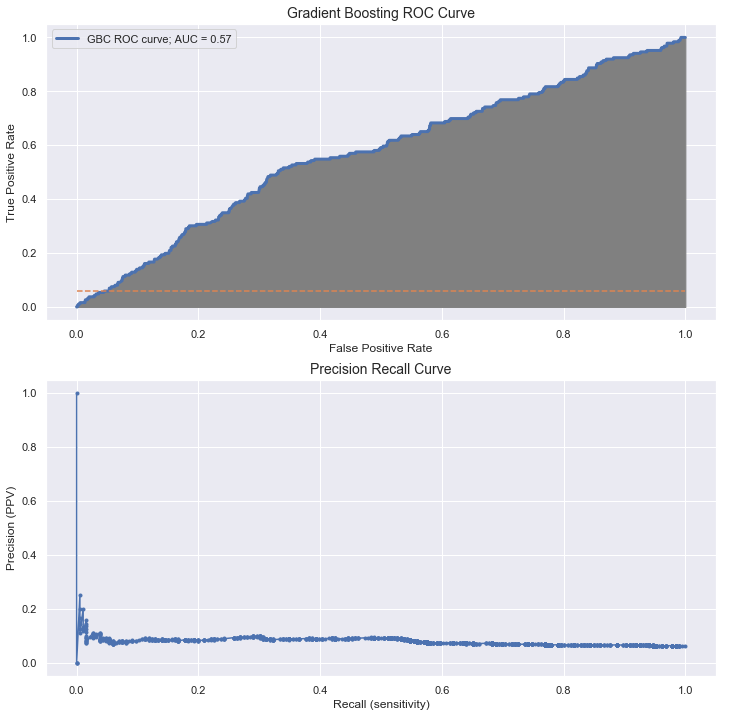

In [199]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
yvd_proba_gbc = best_dt.predict_proba(Xvds)
gbc_fpr_scaled, gbc_tpr_scaled, threshold = roc_curve(yval, yvd_proba_gbc[:,1])
gbc_roc_auc_scaled = auc(gbc_fpr_scaled, gbc_tpr_scaled)
print('AUC: %0.2f' % gbc_roc_auc_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(gbc_fpr_scaled, gbc_tpr_scaled, 0, color='grey')
plt.plot(gbc_fpr_scaled, gbc_tpr_scaled, linewidth=3, label='GBC ROC curve; AUC = %0.2f' % gbc_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvd_proba_gbc[:,1])
# calc f1
f1 = f1_score(yval, yvd_pred_gbc)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvd_proba_gbc[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')
# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

This model can't even predict a true `1`.

### Naive Bayes

In [200]:
skf = StratifiedKFold(n_splits=10, random_state=1)
parameters = {}
#BernoulliNB is designed for binary/boolean features and is suitable for discrete data
nb = BernoulliNB()
gsnb = GridSearchCV(nb, cv=skf, param_grid=parameters, return_train_score=True)
gsnb.fit(Xtds,ytd)
best_nb = gsnb.best_estimator_

yvd_pred_nb = best_nb.predict(Xvds)
print(confusion_matrix(yval, yvd_pred_nb))
print(classification_report(yval, yvd_pred_nb))

[[2746   15]
 [ 186    0]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2761
           1       0.00      0.00      0.00       186

   micro avg       0.93      0.93      0.93      2947
   macro avg       0.47      0.50      0.48      2947
weighted avg       0.88      0.93      0.90      2947



AUC: 0.43
f1=0.000 auc=0.052 ap=0.053


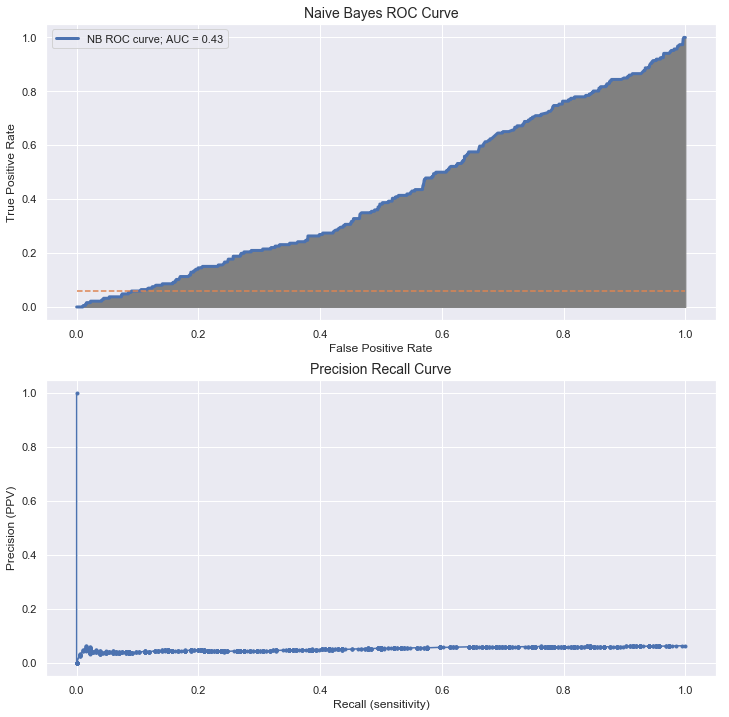

In [201]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# examine metrics
yvd_proba_nb = best_nb.predict_proba(Xvds)
nb_fpr_scaled, nb_tpr_scaled, threshold = roc_curve(yval, yvd_proba_nb[:,1])
nb_roc_auc_scaled = auc(nb_fpr_scaled, nb_tpr_scaled)
print('AUC: %0.2f' % nb_roc_auc_scaled)

plt.figure(figsize=(12,12))

plt.subplot(211)
plt.fill_between(nb_fpr_scaled, nb_tpr_scaled, 0, color='grey')
plt.plot(nb_fpr_scaled, nb_tpr_scaled, linewidth=3, label='NB ROC curve; AUC = %0.2f' % nb_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve', size=14)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvd_proba_nb[:,1])
# calc f1
f1 = f1_score(yval, yvd_pred_nb)
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvd_proba_nb[:,1])
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0,1],[0.06,0.06], linestyle='--')
# plot the precision-recall curve
plt.subplot(212)
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve', size=14)
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

Just like the previous model, this model also can't predict a true '1'.

### XGBOOST 

In [228]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

paramters1 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
gsxgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,
        min_child_weight=1, max_depth=3, gamma=0, subsample=1, colsample_bytree=1, 
        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, random_state=1), 
        param_grid = parameters1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsxgb.fit(Xtds, ytd)
print(gsxgb.best_params_, gsxgb.best_score_)

yvd_pred_xgb = gsxgb.predict(Xvds)

#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(yval, yvd_pred_xgb))
print("AUC ROC Score: %f" % roc_auc_score(yval, yvd_pred_xgb))
print(confusion_matrix(yval, yvd_pred_xgb))
print(classification_report(yval, yvd_pred_xgb))

{'C': 2} 0.70540625

Model Report
Accuracy : 0.8086
AUC ROC Score: 0.464139
[[2370  391]
 [ 173   13]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2761
           1       0.03      0.07      0.04       186

   micro avg       0.81      0.81      0.81      2947
   macro avg       0.48      0.46      0.47      2947
weighted avg       0.88      0.81      0.84      2947



The scores look terrible. Since we want to correctly classify the 1s, we can see our model isn't doing terribly well. 

# Chosen Model and Feature Selection

Our positives are our customers that will ultimately buy Caravan insurance. In this scenario, false negatives are more harmful than false positives. For false negatives, we miss the opportunity to advertise to a potential customer, who may have yielded large profits had they bought the insurance, for example. For false positives, we might spend a small amount of money advertising to someone who ultimately does not buy the insurance. By this reasoning, a higher recall is the priority, even if it means a slightly lower precision.

Overall, `Random Forest Classifier` on `Over sampling` data yields the best `ROC AUC`, `ROC PRC`, `Precision`, `Recall`, and `F1` scores so we will employ it as our chosen model to find out which features play the most important role in identifying caravan purchase.

Confusion matrix: 
[[1992  769]
 [  59  127]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      2761
           1       0.14      0.68      0.23       186

   micro avg       0.72      0.72      0.72      2947
   macro avg       0.56      0.70      0.53      2947
weighted avg       0.92      0.72      0.79      2947

AUC_ROC: 0.74
auc_prc=0.174 ap=0.166


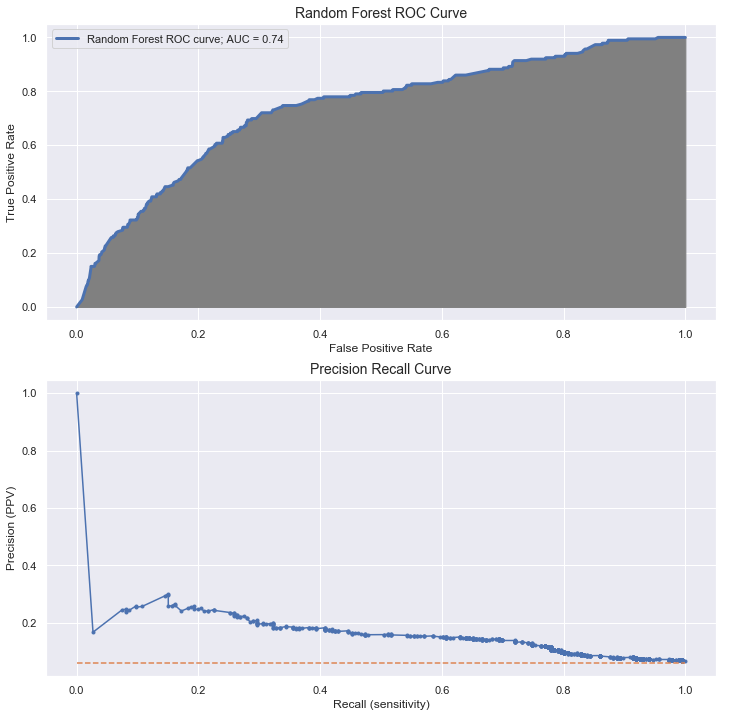

In [235]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, verbose=0,
            warm_start=False, random_state=1)

rfc.fit(Xtus, ytu)
yvo_pred_rfc = rfc.predict(Xvus)
cmrf = confusion_matrix(yval, yvo_pred_rfc)
print('Confusion matrix: ')
print(cmrf)
print(classification_report(yval, yvo_pred_rfc))

# examine metrics
yvo_proba_rfc = rfc.predict_proba(Xvus)
rfc_fpr_scaled, rfc_tpr_scaled, threshold = roc_curve(yval, yvo_proba_rfc[:,1])
rfc_roc_auc_scaled = auc(rfc_fpr_scaled, rfc_tpr_scaled)
print('AUC_ROC: %0.2f' % rfc_roc_auc_scaled)

# calc precision-recall curve
precision, recall, thresholds = precision_recall_curve(yval, yvo_proba_rfc[:,1])
# calc precision recall auc
auc = auc(recall, precision)
# calc average precision score
ap = average_precision_score(yval, yvo_proba_rfc[:,1])
print('auc_prc=%.3f ap=%.3f' % (auc, ap))


plt.figure(figsize=(12,12))

# plot ROC AUC cruve
plt.subplot(211)
plt.fill_between(rfc_fpr_scaled, rfc_tpr_scaled, 0, color='grey')
plt.plot(rfc_fpr_scaled, rfc_tpr_scaled, linewidth=3, label='Random Forest ROC curve; AUC = %0.2f' % rfc_roc_auc_scaled)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', size=14)


# plot the precision-recall curve
plt.subplot(212)
plt.title('Precision Recall Curve', size=14)
plt.plot(recall, precision, marker='.')
plt.plot([0,1], [0.06,0.06], linestyle= '--')
plt.xlabel('Recall (sensitivity)')
plt.ylabel('Precision (PPV)')
plt.show()

In [236]:
#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(yval, yvo_pred_rfc))
print("AUC Score: %f" % roc_auc_score(yval, yvo_pred_rfc))

ranks=pd.DataFrame(data={
    'Actual':yval,
    'Predicted':yvo_pred_rfc,
    'Rank':yvo_proba_rfc[:,1]
})
ranks.sort_values(by=['Rank'],ascending=False,inplace=True)
top = ranks.where(ranks['Rank']>0.5,).dropna()
top.shape


Model Report
Accuracy : 0.719
AUC Score: 0.702137


(896, 3)

In [138]:
Xvus = pd.DataFrame(Xvus, columns=X.columns)

def rf_feature_importance(model, df):
    return pd.DataFrame({'feature': df.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

def plot_feature_importance(feature_importance):
    return feature_importance.plot('feature', 'importance', 'barh', figsize=(12,8), legend=False)

feature_importance = rf_feature_importance(rfc, Xvus)
feature_importance[:10]

,feature,importance
36,PPERSAUT,0.363957
38,APERSAUT,0.147484
37,PBRAND,0.135754
35,MKOOPKLA,0.064667
17,MBERARBG,0.037499
16,MBERMIDD,0.032084
6,MRELGE,0.030895
26,MAUT1,0.028264
8,MRELOV,0.024232
14,MOPLLAAG,0.015902


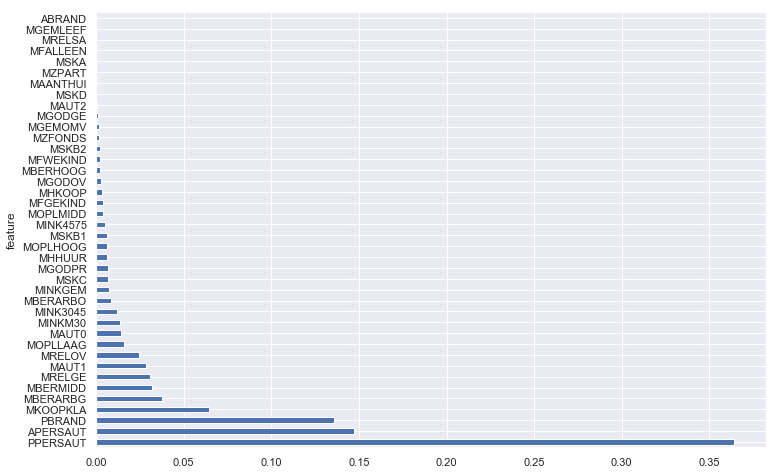

In [139]:
plot_feature_importance(feature_importance)

# Conclusion

* For our dataset, `over sampling` help our models' accuracy and predictive performance more than `down sampling` does. 
* `ROC curve` is not the best visual illustration for highly imbalanced data, because the False Positive Rate (False Positives / Total Real Negatives) does not drop drastically when the Total Real Negatives is huge. 
* `Precision-recall` plot is more informative than the ROC plot when applied to imbalanced datasets.

## Most important features:**

 1. `PPERSAUT`: Contribution car policies
 2. `PBRAND`: Contribution fire policies
 3. `APERSAUT`: Number of car policies

Our modeling process has provided some useful insights about the target market. In particular, it can be safely concluded that the target market is probably not a single group. There are at least two main customer profiles (those who are interested in car policies and those are are interested in fire policies), who are likely to own caravans and therefore are potential buyers of Caravan Insurance. For marketing purposes, each group would probably need to be approached in different ways, both in terms of the communication message as well as the medium of communication. We identified 896 customer who have higher probability of answering our mails.

Our chosen model's performance is still somewhat lacking in its ability to predict the positive class due to the fact that our data is highly imbalanced. However, there are still rooms for improvements, for example, we can try:
    * different parameters 
    * more models 
    * another way to correct imbalance 
    * PCA 